In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from FabryPerot import SpectrumAnalyzer as SA

MEDIUM_SIZE = 11
BIGGER_SIZE = 13

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

base_font = {'family': 'serif',
        'size': MEDIUM_SIZE,
        }

title_font = {
        'family': 'serif',
        'color':  'black',
        'size': BIGGER_SIZE,
        'weight' : 'bold'
        }

In [18]:
spectrum = SA('2024-11-27/Farby_Perot_transmission_signal')

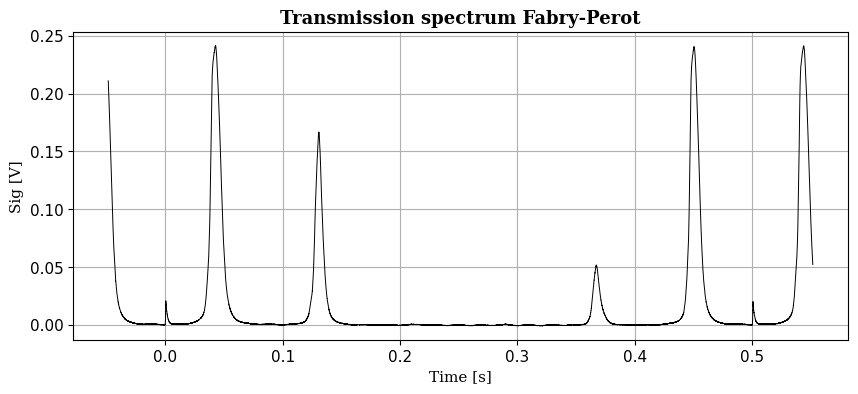

In [19]:
spectrum.plot_spectrum()
plt.show()

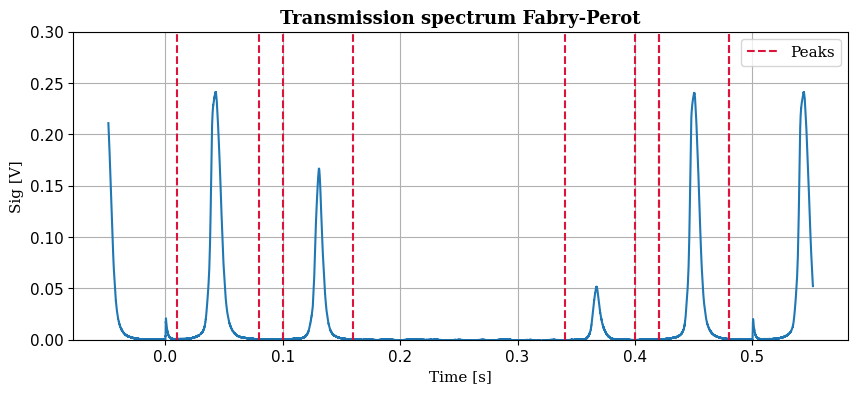

In [20]:
spectrum.select_peaks(
  [
    [0.01, 0.08],
    [0.10, 0.16],
    [0.34, 0.4],
    [0.42, 0.48]
  ]
)

-----------------------------------------------------------------------------------------

Peak height = 264 mV, Peak Pos = 43 ms, PW Ratio = 0.601



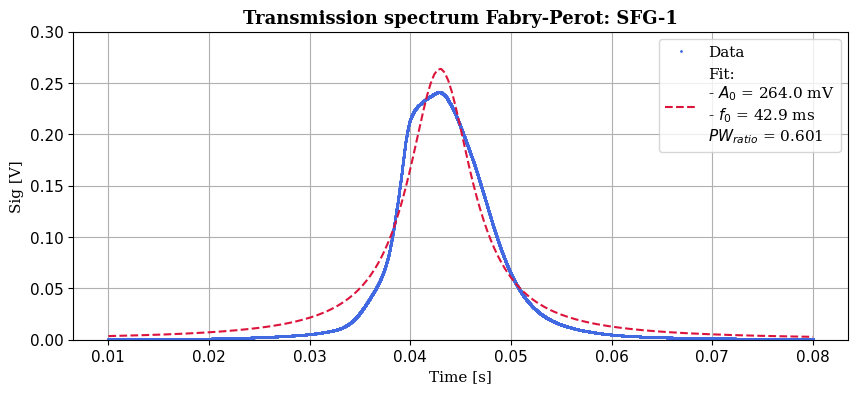

-----------------------------------------------------------------------------------------

Peak height = 173 mV, Peak Pos = 131 ms, PW Ratio = 0.309



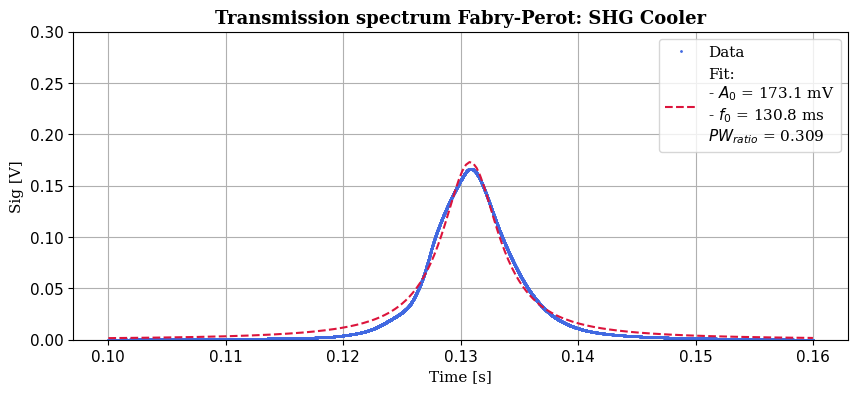

-----------------------------------------------------------------------------------------

Peak height = 53 mV, Peak Pos = 367 ms, PW Ratio = 0.090



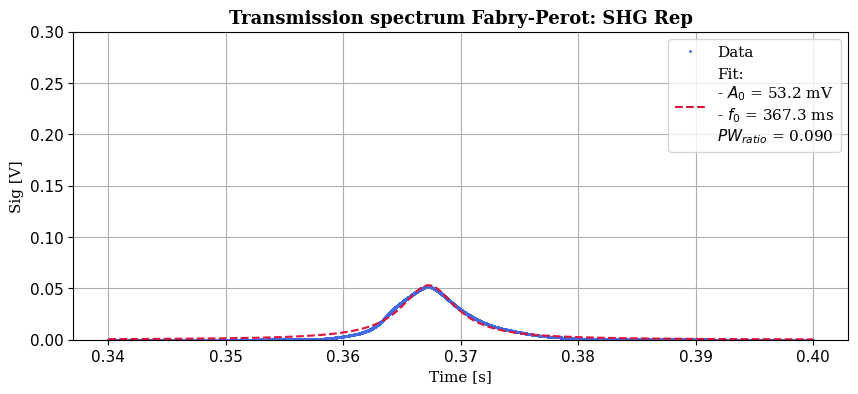

-----------------------------------------------------------------------------------------

Peak height = 263 mV, Peak Pos = 451 ms, PW Ratio = 0.548



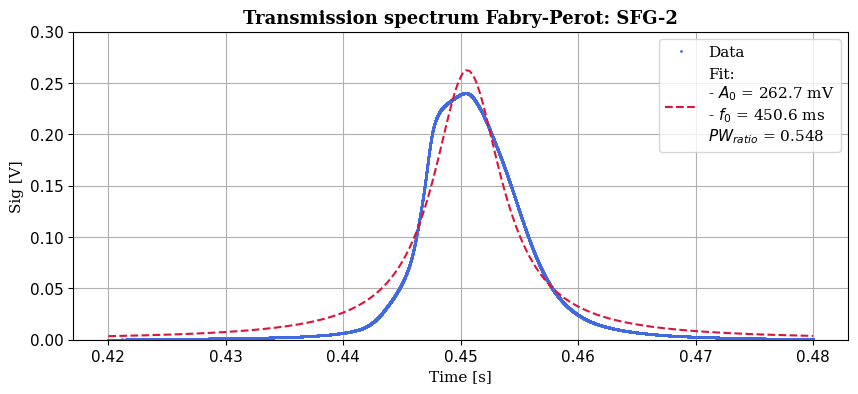

In [21]:
names = ['SFG-1', 'SHG Cooler', 'SHG Rep', 'SFG-2']
tot_pw = 0
for i, peak in enumerate(spectrum.peaks[:-1]):
  peak.integrate()
  tot_pw = tot_pw + peak.Integral

spectrum.Tot_PW = tot_pw
  
for i, peak in enumerate(spectrum.peaks):
  peak.integrate()
  print('-----------------------------------------------------------------------------------------')
  peak.fit(interval=[peak.Time[0], peak.Time[-1]], plot=True, tot_pw=spectrum.Tot_PW, name=names[i])

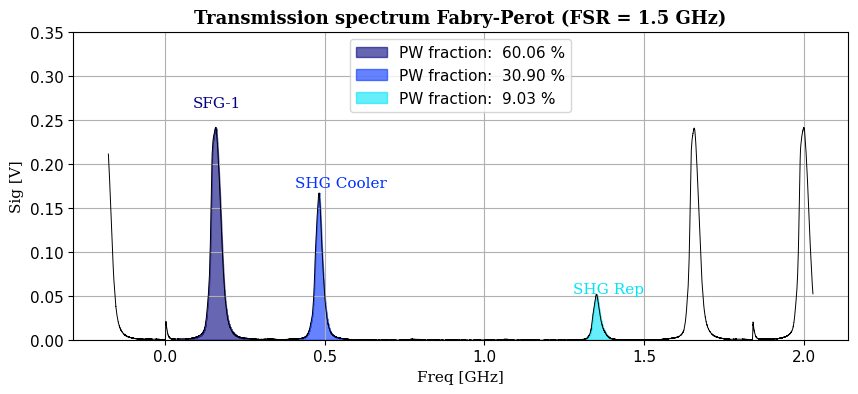

In [22]:
TimeToFreq = 1.5 / (spectrum.peaks[3].peak_pos - spectrum.peaks[0].peak_pos)
spectrum.Set_TimeToFreq_conv(TimeToFreq)
ax = spectrum.plot_spectrum()
ax.set_ylim(0, 0.35)
color_palette = plt.cm.jet(np.linspace(0.0, 0.35, 3))
for i, peak in enumerate(spectrum.peaks[:-1]):
  ax.text(x=(peak.peak_pos -0.02) * TimeToFreq, y=peak.height, s=names[i], fontdict=base_font, color=color_palette[i % 3])
  ax.fill_between(peak.Time * TimeToFreq, peak.Sig, color=color_palette[i % 3], alpha=0.6, label=f'PW fraction:  {peak.pw_fraction*100:.2f} %')

ax.set_title('Transmission spectrum Fabry-Perot (FSR = 1.5 GHz)', fontdict=title_font)
ax.legend(loc='upper center')
plt.show()